# Landry-Subotnik problem

In [1]:
import sys
import cmath
import math
import os

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
from libra_py import models_Libra
from libra_py import tsh
from libra_py import tsh_stat
from libra_py import tsh_algo1
from libra_py import tsh_algo2
from libra_py import data_conv

import matplotlib.pyplot as plt   # plots
import numpy as np
from matplotlib.mlab import griddata

%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

## 1. Model Hamiltonian 

In [2]:
xmin = 0.0
xmax = 100.0
dx = 1.0

X = []
nsteps = int((xmax - xmin) / dx) + 1

for i in xrange(nsteps):
    X.append(xmin + i * dx)

In [3]:
gamma_i = 3
eps_i = 5

model_params = models_Libra.get_Landry_Subotnik_set1(gamma_i, eps_i)
print model_params

H00, H11, H01 = [], [], []
dH00, dH11, dH01 = [], [], []
for i in xrange(nsteps):
    q = MATRIX(1,1); q.set(0, 0, X[i])
    obj = models_Libra.model1(q, model_params)
    
    H00.append(obj.ham_dia.get(0,0).real)
    H11.append(obj.ham_dia.get(1,1).real)
    H01.append(obj.ham_dia.get(0,1).real)    
    
    dH00.append(obj.d1ham_dia[0].get(0,0).real)
    dH11.append(obj.d1ham_dia[0].get(1,1).real)
    dH01.append(obj.d1ham_dia[0].get(0,1).real) 

{'D': -0.0196875, 'k': 6.125e-08, 'V': 5e-05, 'mass': 1.0, 'kT': 0.00095, 'x0': 624.6631745450128, 'gamma': 0.00015}


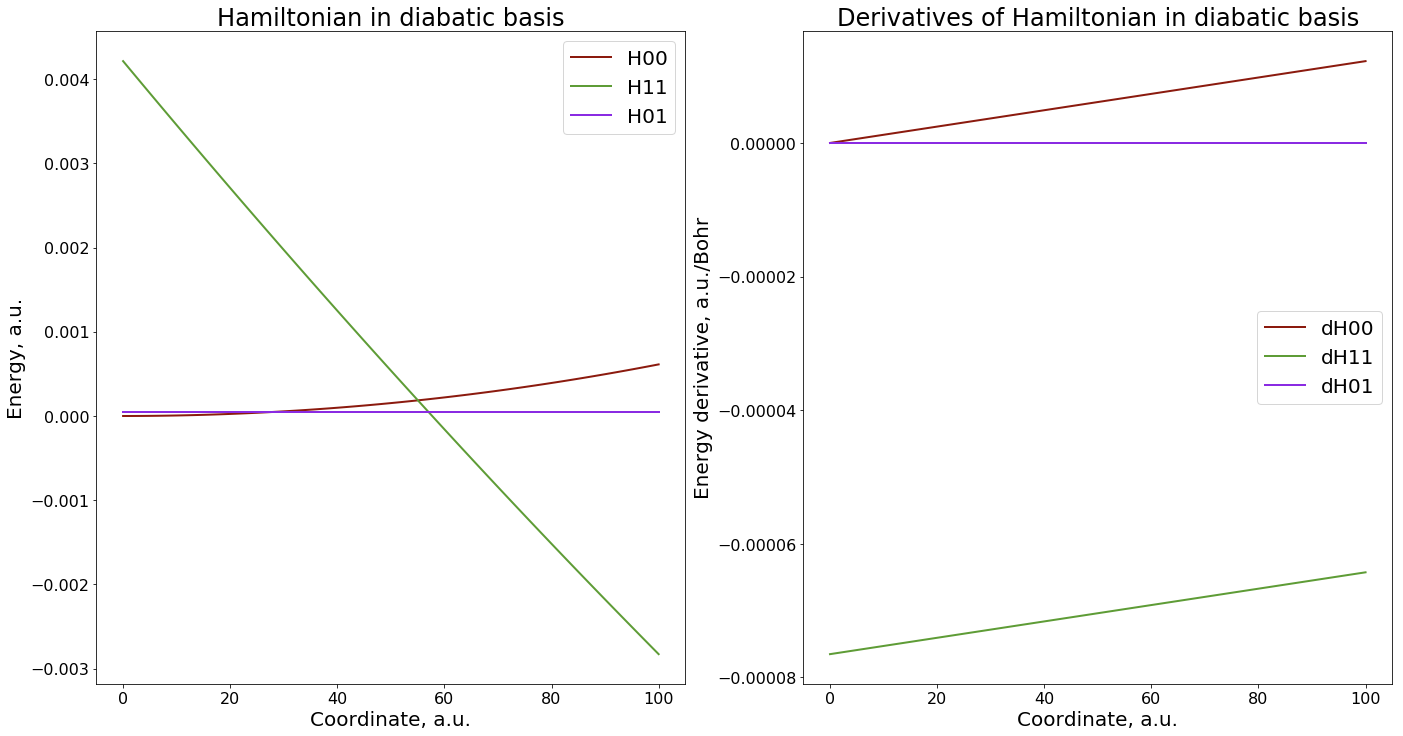

In [4]:
plt.figure(1, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, H00, label='H00', linewidth=2, color = colors["11"]) 
plt.plot(X, H11, label='H11', linewidth=2, color = colors["21"]) 
plt.plot(X, H01, label='H01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.subplot(1,2,2)
plt.title('Derivatives of Hamiltonian in diabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy derivative, a.u./Bohr')
plt.plot(X, dH00, label='dH00', linewidth=2, color = colors["11"]) 
plt.plot(X, dH11, label='dH11', linewidth=2, color = colors["21"]) 
plt.plot(X, dH01, label='dH01', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()

In [5]:
def compute_model(q, params, full_id):

    #model = params["model"]
    res = None
    Id = Cpp2Py(full_id)
    indx = Id[-1]

    res = models_Libra.model1(q.col(indx), params)
    return res

In [6]:
ham = nHamiltonian(2,2,1)
ham1 = nHamiltonian(2, 2, 1)
ham.init_all(2)
ham1.init_all(2)
ham.add_child(ham1)

q = MATRIX(1,1)
E00, E11, d01 = [], [], []
dE00, dE11 = [], []
Cadi, Padi = [], []

for x in X:    
    q.set(0,0,x)
    ham.compute_diabatic(compute_model, q, model_params, 1)
    ham.compute_adiabatic(1, 1)
    
    E00.append( ham.get_ham_adi(Py2Cpp_int([0,0])).get(0,0).real )
    E11.append( ham.get_ham_adi(Py2Cpp_int([0,0])).get(1,1).real )
    d01.append( 0.01* ham.get_dc1_adi(0, Py2Cpp_int([0,0])).get(0,1).real  )
    
    dE00.append( ham.get_d1ham_adi(0, Py2Cpp_int([0,0])).get(0,0).real )
    dE11.append( ham.get_d1ham_adi(0, Py2Cpp_int([0,0])).get(1,1).real )

    cdia = CMATRIX(2,1); cdia.set(0,0, 1.0+0.0j)    
    cadi = CMATRIX(2,1)
    ham.ampl_dia2adi(cdia, cadi, Py2Cpp_int([0,0]))
    
    Cadi.append( CMATRIX(cadi) )
    Padi.append( cadi * cadi.H() )


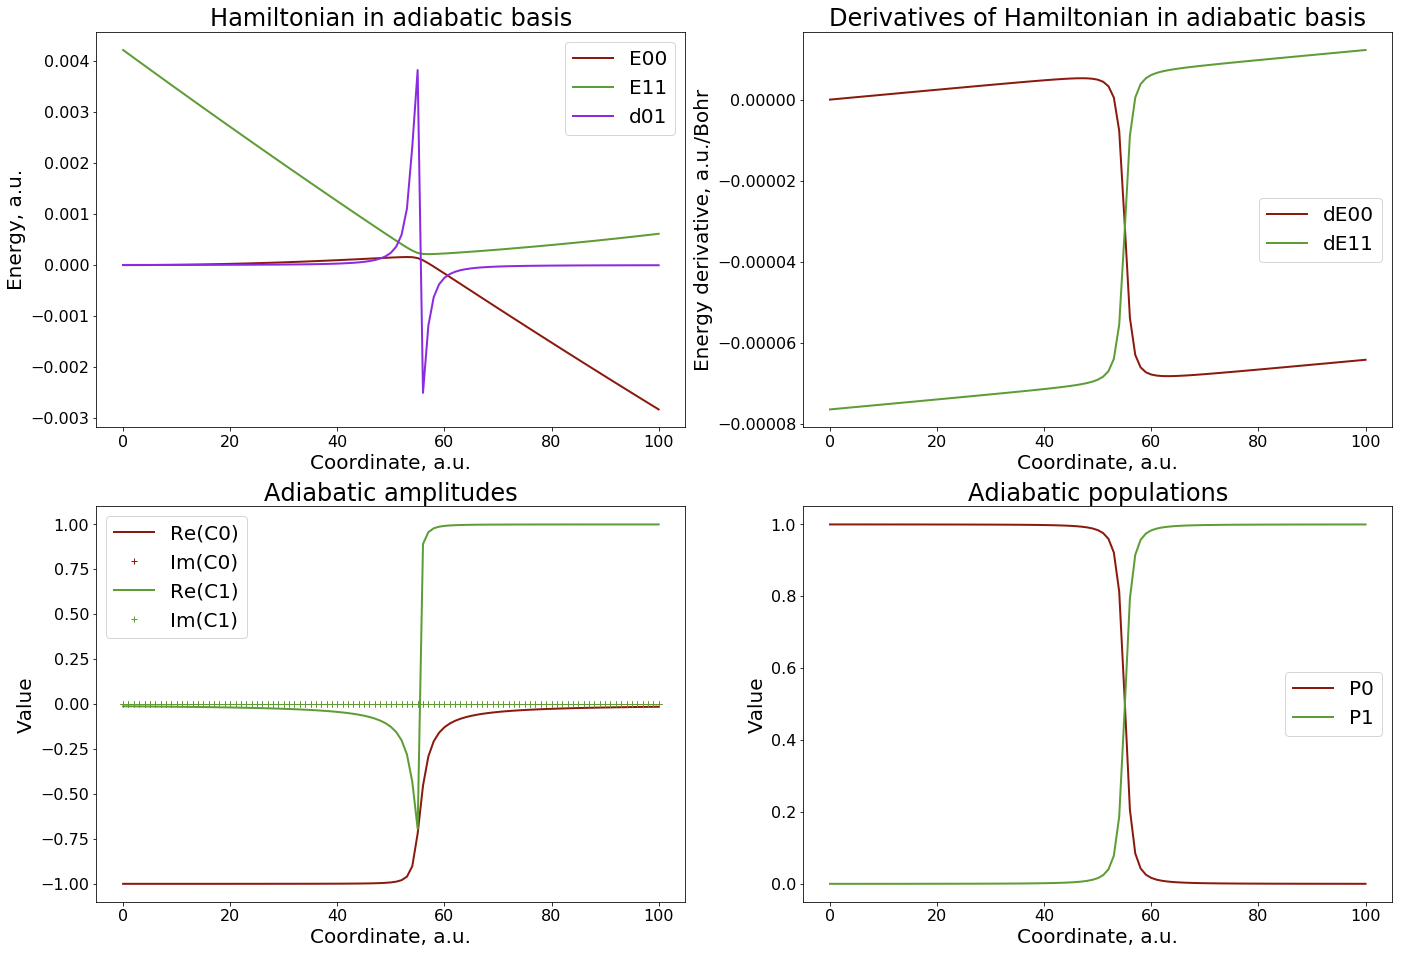

In [7]:
plt.figure(1, figsize=(24, 16)) # dpi=300, frameon=False)
plt.subplot(2,2,1)
plt.title('Hamiltonian in adiabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(X, E00, label='E00', linewidth=2, color = colors["11"]) 
plt.plot(X, E11, label='E11', linewidth=2, color = colors["21"]) 
plt.plot(X, d01, label='d01', linewidth=2, color = colors["31"]) 
plt.legend()

plt.subplot(2,2,2)
plt.title('Derivatives of Hamiltonian in adiabatic basis')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Energy derivative, a.u./Bohr')
plt.plot(X, dE00, label='dE00', linewidth=2, color = colors["11"]) 
plt.plot(X, dE11, label='dE11', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(2,2,3)
plt.title('Adiabatic amplitudes')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Value')
plt.plot(X, data_conv.unpack1(Cadi, 0, 0, 0), label='Re(C0)', linewidth=2, color = colors["11"]) 
plt.plot(X, data_conv.unpack1(Cadi, 0, 0, 1), "+",label='Im(C0)', linewidth=2, color = colors["11"]) 
plt.plot(X, data_conv.unpack1(Cadi, 1, 0, 0), label='Re(C1)', linewidth=2, color = colors["21"]) 
plt.plot(X, data_conv.unpack1(Cadi, 1, 0, 1), "+", label='Im(C1)', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(2,2,4)
plt.title('Adiabatic populations')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Value')
plt.plot(X, data_conv.unpack1(Padi, 0, 0, 0), label='P0', linewidth=2, color = colors["11"]) 
plt.plot(X, data_conv.unpack1(Padi, 1, 1, 0), label='P1', linewidth=2, color = colors["21"]) 
plt.legend()


plt.show()
plt.close()

## 2. A single scattering run

First, define the model to compute the Hamiltonian and derivatives

Setup dynamical variables, model parameters, simulations parameters and run the calculations

In [8]:
# Random numbers generator object
rnd = Random()


# Dimensionality and dynamical variables
ndia, nadi, nnucl, ntraj = 2, 2, 1, 50

mass = 1.0
kT = model_params["kT"]
T  = model_params["kT"]/units.kB

mean_q = MATRIX(nnucl,1);   mean_q.set(0,0, -2.0)
sigma_q = MATRIX(nnucl,1);  sigma_q.set(0,0, 0.0)
mean_p = MATRIX(nnucl,1);   mean_p.set(0,0,  0.0)
sigma_p = MATRIX(nnucl,1);  sigma_p.set(0,0, math.sqrt(kT * mass))

q = MATRIX(nnucl,ntraj);  tsh.sample(q, mean_q, sigma_q, rnd)
p = MATRIX(nnucl,ntraj);  tsh.sample(p, mean_p, sigma_p, rnd)
iM = MATRIX(nnucl,1);     iM.set(0,0, mass)

istate = 0
Cdia, Cadi = CMATRIX(ndia, ntraj), CMATRIX(nadi, ntraj)
states = intList() 

for traj in xrange(ntraj):
    Cadi.set(istate, traj, 1.0+0.0j);  
    states.append(istate) 


# Model parameters 

# Dynamics (Simulation) parameters

dyn_params = { "rep":1, "rep_sh":1, "tsh_method":0, "use_boltz_factor":0,
               "nsteps":5000,
               "Temperature":300.0, "do_reverse":1, "vel_rescale_opt":1, "dt":2.5,
               "BATH_params":{"Temperature":300.0, "Q":10.0, "thermostat_type":"Nose-Hoover", "nu_therm":0.01, "NHC_size":10}
             }

#res = tsh_algo1.run_tsh(q, p, iM, Cdia, Cadi, states, model_params, dyn_params, compute_model, rnd)
res = tsh_algo2.run_tsh(q, p, iM, Cdia, Cadi, states, model_params, dyn_params, compute_model, rnd)


Extract the results of the calculation and plot them

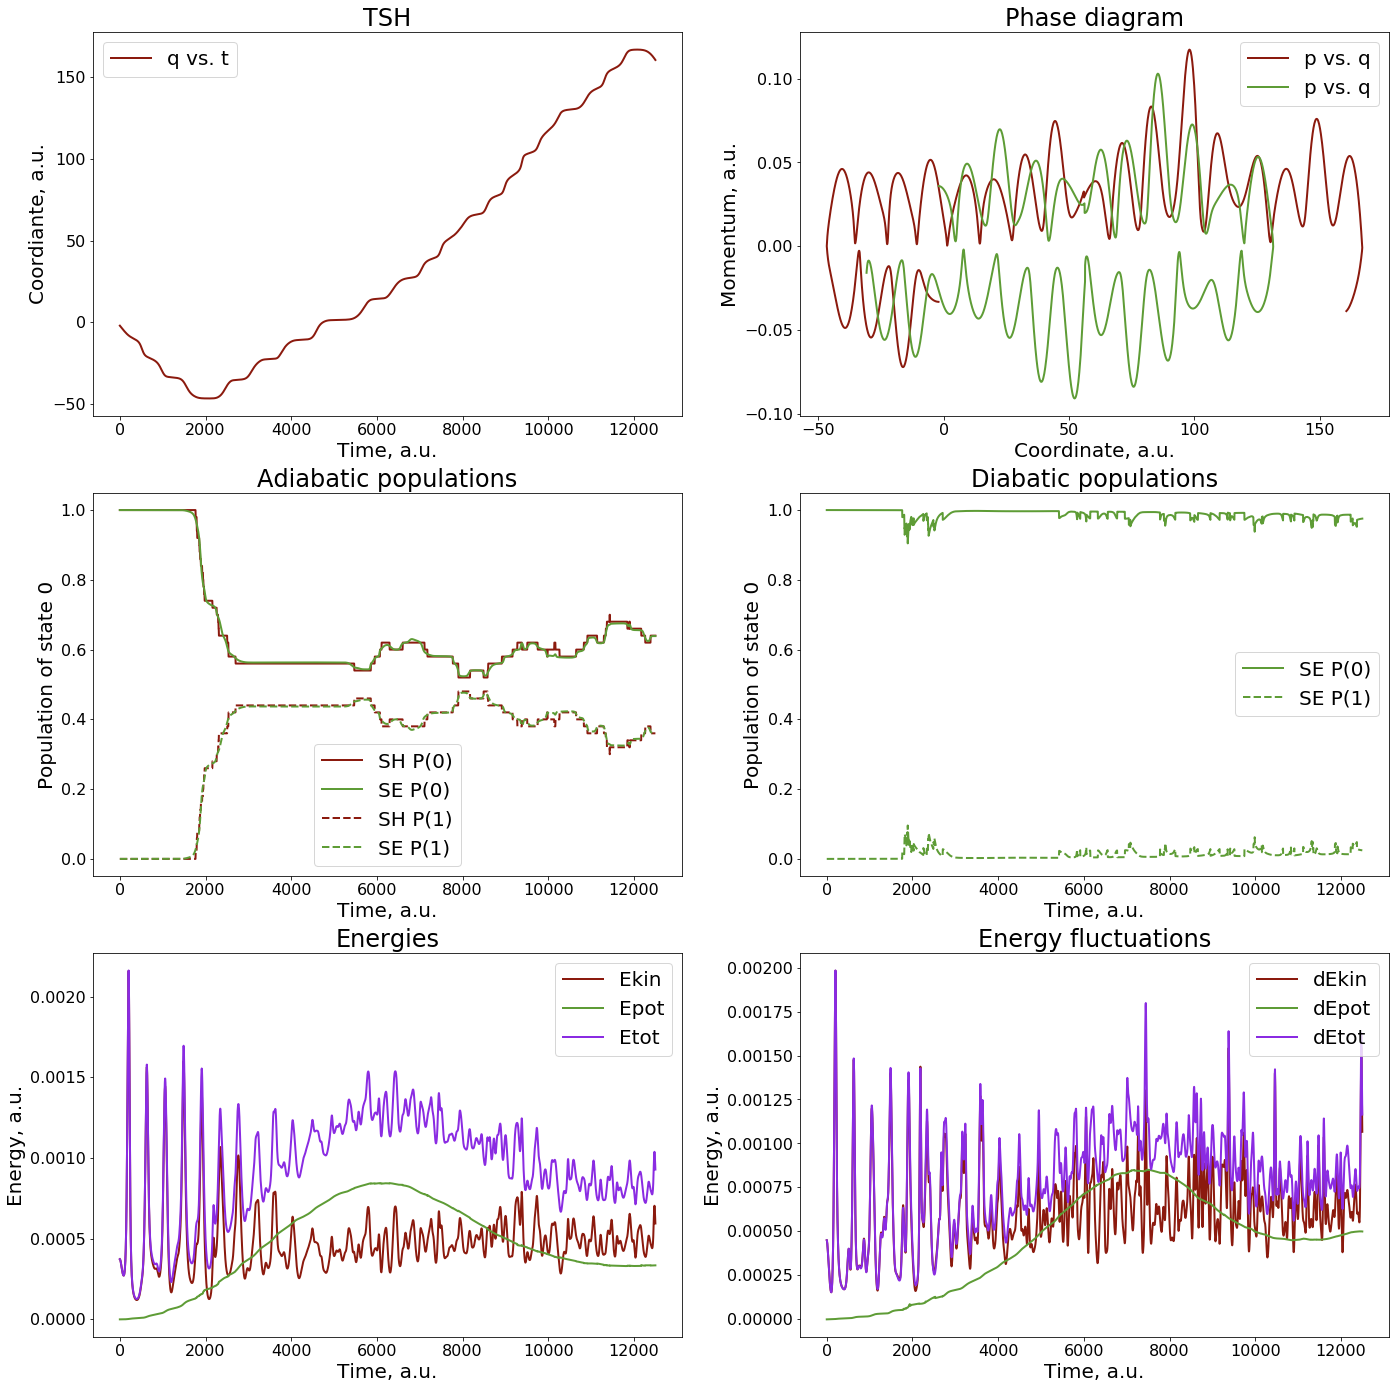

In [10]:
# Format: 
#   0      1      2       3        4        5           6          7        8            9       10        11            12        13       14 
#obs_T, obs_q, obs_p, obs_Ekin, obs_Epot, obs_Etot, obs_dEkin, obs_dEpot, obs_dEtot, obs_Cadi, obs_Cdia, obs_dm_adi, obs_dm_dia, obs_pop  obs_states

obs_T = res[0]
obs_q = data_conv.unpack1(res[1], 0, 0, 2)
obs_p = data_conv.unpack1(res[2], 0, 0, 2)

obs_q2 = data_conv.unpack1(res[1], 0, 1, 2)
obs_p2 = data_conv.unpack1(res[2], 0, 1, 2)

obs_Ekin = res[3]
obs_Epot = res[4]
obs_Etot = res[5]
obs_dEkin = res[6]
obs_dEpot = res[7]
obs_dEtot = res[8]
obs_dm_adi00 = data_conv.unpack1(res[11], 0, 0, 0)
obs_dm_adi11 = data_conv.unpack1(res[11], 1, 1, 0)
obs_dm_dia00 = data_conv.unpack1(res[12], 0, 0, 0)
obs_dm_dia11 = data_conv.unpack1(res[12], 1, 1, 0)
obs_pop00 = data_conv.unpack1(res[13], 0, 0, 2)
obs_pop11 = data_conv.unpack1(res[13], 1, 0, 2)



plt.figure(1, figsize=(24, 24)) # dpi=300, frameon=False)
plt.subplot(3,2,1)
plt.title('TSH')
plt.xlabel('Time, a.u.')
plt.ylabel('Coordiante, a.u.')
plt.plot(obs_T, obs_q, label='q vs. t', linewidth=2, color = colors["11"]) 
plt.legend()

plt.subplot(3,2,2)
plt.title('Phase diagram')
plt.xlabel('Coordinate, a.u.')
plt.ylabel('Momentum, a.u.')
plt.plot(obs_q, obs_p, label='p vs. q', linewidth=2, color = colors["11"]) 
plt.plot(obs_q2, obs_p2, label='p vs. q', linewidth=2, color = colors["21"]) 
plt.legend()


plt.subplot(3,2,3)
plt.title('Adiabatic populations')
plt.xlabel('Time, a.u.')
plt.ylabel('Population of state 0')
plt.plot(obs_T, obs_pop00, label='SH P(0)', linewidth=2, color = colors["11"]) 
plt.plot(obs_T, obs_dm_adi00, label='SE P(0)', linewidth=2, color = colors["21"]) 
plt.plot(obs_T, obs_pop11, "--", label='SH P(1)', linewidth=2, color = colors["11"]) 
plt.plot(obs_T, obs_dm_adi11, "--", label='SE P(1)', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(3,2,4)
plt.title('Diabatic populations')
plt.xlabel('Time, a.u.')
plt.ylabel('Population of state 0')
plt.plot(obs_T, obs_dm_dia00, label='SE P(0)', linewidth=2, color = colors["21"]) 
plt.plot(obs_T, obs_dm_dia11, "--", label='SE P(1)', linewidth=2, color = colors["21"]) 
plt.legend()

plt.subplot(3,2,5)
plt.title('Energies')
plt.xlabel('Time, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(obs_T, obs_Ekin, label='Ekin', linewidth=2, color = colors["11"]) 
plt.plot(obs_T, obs_Epot, label='Epot', linewidth=2, color = colors["21"]) 
plt.plot(obs_T, obs_Etot, label='Etot', linewidth=2, color = colors["31"]) 
plt.legend()

plt.subplot(3,2,6)
plt.title('Energy fluctuations')
plt.xlabel('Time, a.u.')
plt.ylabel('Energy, a.u.')
plt.plot(obs_T, obs_dEkin, label='dEkin', linewidth=2, color = colors["11"]) 
plt.plot(obs_T, obs_dEpot, label='dEpot', linewidth=2, color = colors["21"]) 
plt.plot(obs_T, obs_dEtot, label='dEtot', linewidth=2, color = colors["31"]) 
plt.legend()


plt.show()
plt.close()